In [36]:
# imports

import os
from dotenv import load_dotenv
from huggingface_hub import login
from datasets import load_dataset
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import numpy as np
import random
from pricer.items import Item
from pricer.loaders import ItemLoader
load_dotenv(override=True)

True

In [2]:
# Log in to HuggingFace - if you get a "Note" about Environment variable being set, ignore it

hf_token = os.environ['HF_TOKEN']
login(hf_token, add_to_git_credential=True)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [3]:
dataset_names = [
    "Automotive",
    "Electronics",
    "Office_Products",
    "Tools_and_Home_Improvement",
    "Cell_Phones_and_Accessories",
    "Toys_and_Games",
    "Appliances",
    "Musical_Instruments",
]

In [4]:
items = []
for dataset_name in dataset_names:
    loader = ItemLoader(dataset_name)
    items.extend(loader.load())

Loading dataset Automotive


README.md: 0.00B [00:00, ?B/s]

Amazon-Reviews-2023.py: 0.00B [00:00, ?B/s]

raw/meta_categories/meta_Automotive.json(…):   0%|          | 0.00/5.35G [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

100%|██████████| 2004/2004 [01:49<00:00, 18.24it/s]


Completed Automotive with 974,469 datapoints in 5.5 mins
Loading dataset Electronics


raw/meta_categories/meta_Electronics.jso(…):   0%|          | 0.00/5.25G [00:00<?, ?B/s]

Generating full split:   0%|          | 0/1610012 [00:00<?, ? examples/s]

100%|██████████| 1611/1611 [01:28<00:00, 18.21it/s]


Completed Electronics with 464,024 datapoints in 4.9 mins
Loading dataset Office_Products


raw/meta_categories/meta_Office_Products(…):   0%|          | 0.00/2.15G [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

100%|██████████| 711/711 [00:27<00:00, 26.30it/s]


Completed Office_Products with 248,767 datapoints in 2.0 mins
Loading dataset Tools_and_Home_Improvement


raw/meta_categories/meta_Tools_and_Home_(…):   0%|          | 0.00/4.85G [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

100%|██████████| 1474/1474 [01:27<00:00, 16.76it/s]


Completed Tools_and_Home_Improvement with 552,147 datapoints in 4.6 mins
Loading dataset Cell_Phones_and_Accessories


raw/meta_categories/meta_Cell_Phones_and(…):   0%|          | 0.00/4.02G [00:00<?, ?B/s]

Generating full split:   0%|          | 0/1288490 [00:00<?, ? examples/s]

100%|██████████| 1289/1289 [01:06<00:00, 19.40it/s]


Completed Cell_Phones_and_Accessories with 242,351 datapoints in 3.6 mins
Loading dataset Toys_and_Games


raw/meta_categories/meta_Toys_and_Games.(…):   0%|          | 0.00/2.64G [00:00<?, ?B/s]

Generating full split:   0%|          | 0/890874 [00:00<?, ? examples/s]

100%|██████████| 891/891 [00:39<00:00, 22.84it/s]


Completed Toys_and_Games with 347,657 datapoints in 2.5 mins
Loading dataset Appliances


raw/meta_categories/meta_Appliances.json(…):   0%|          | 0.00/285M [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

100%|██████████| 95/95 [00:01<00:00, 54.76it/s]


Completed Appliances with 35,307 datapoints in 0.3 mins
Loading dataset Musical_Instruments


raw/meta_categories/meta_Musical_Instrum(…):   0%|          | 0.00/632M [00:00<?, ?B/s]

Generating full split:   0%|          | 0/213593 [00:00<?, ? examples/s]

100%|██████████| 214/214 [00:06<00:00, 33.12it/s]


Completed Musical_Instruments with 68,855 datapoints in 0.6 mins


In [5]:
print(len(items))

2933577


In [6]:
items[0].full

'OkuTech Black Retractable Cargo Cover Rear Cargo Privacy Screen Car Trunk Luggage Security Shade Shield for Dodge Journey 5 Seat 2009-2020\n[\'Product Details:\', \'Fits Car Model: Dodge Journey 5 Seat 2009-2020 Product Name: Retractable Cargo Cover Material: Aluminum alloy&Canvas Highlights & Features:\', "1. Bar part is Made of Aluminum (Strengthen the main bar). 2. Designed open handle, Easy to handle and remove. Strengthen springs in both retract ends. Direct snap-on designed for easy installation. Installs in seconds! No Drilling needed. 3. Perfect matching with original slot. Raised squre on the ends and flocked fabric covered the retract ends and let you keep away it form annoying noise. No scratches or wear marks. 4. Surface Finish: Designed from the best top quality material, this cargo cover was specially built to be easy to install and remove. Made of water-repellent  pro-grade Canvas with structural form-fitting stiffeners. The unrivaled quality, this cover is also tear-re

In [7]:
random.seed(42)
random.shuffle(items)
seen = set()
items = [x for x in tqdm(items) if not (x.title in seen or seen.add(x.title))]

seen = set()
items = [x for x in tqdm(items) if not (x.full in seen or seen.add(x.full))]

  0%|          | 0/2933577 [00:00<?, ?it/s]

  0%|          | 0/2889429 [00:00<?, ?it/s]

In [8]:
del seen
print(f"After deduplication, we have {len(items):,} items")

After deduplication, we have 2,887,890 items


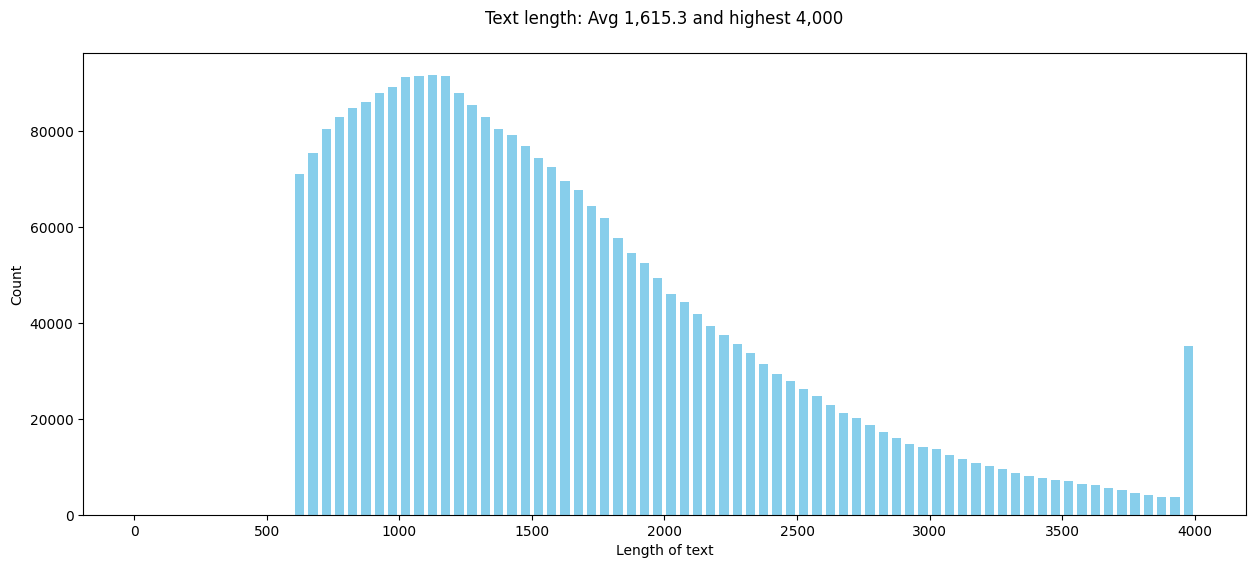

In [9]:
lengths = [len(item.full) for item in items]
plt.figure(figsize=(15,6))
plt.title(f"Text length: Avg {sum(lengths)/len(lengths):,.1f} and highest {max(lengths):,}\n")
plt.xlabel("Length of text")
plt.ylabel("Count")
plt.hist(lengths, rwidth=0.7, color = 'skyblue', bins=range(0, 4050, 50))
plt.show()

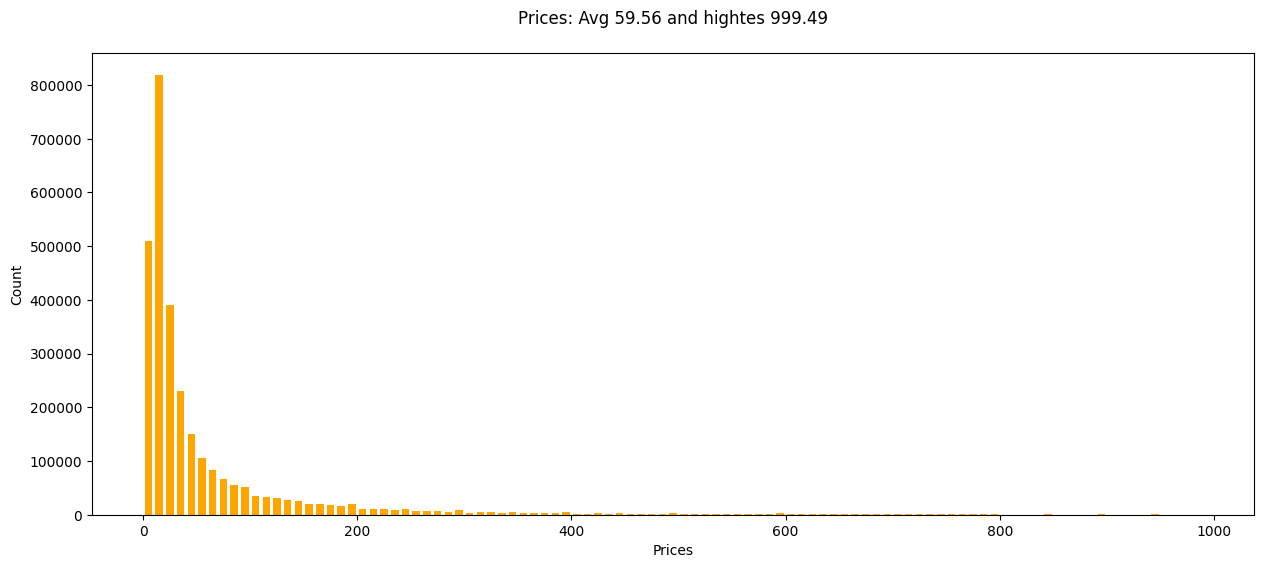

In [11]:
prices = [item.price for item in items]
plt.figure(figsize=(15,6))
plt.title(f"Prices: Avg {sum(prices)/len(prices):,.2f} and hightes {max(prices):,}\n")
plt.xlabel("Prices")
plt.ylabel("Count")
plt.hist(prices, rwidth=0.7, color='orange', bins=range(0, 1000, 10))
plt.show()

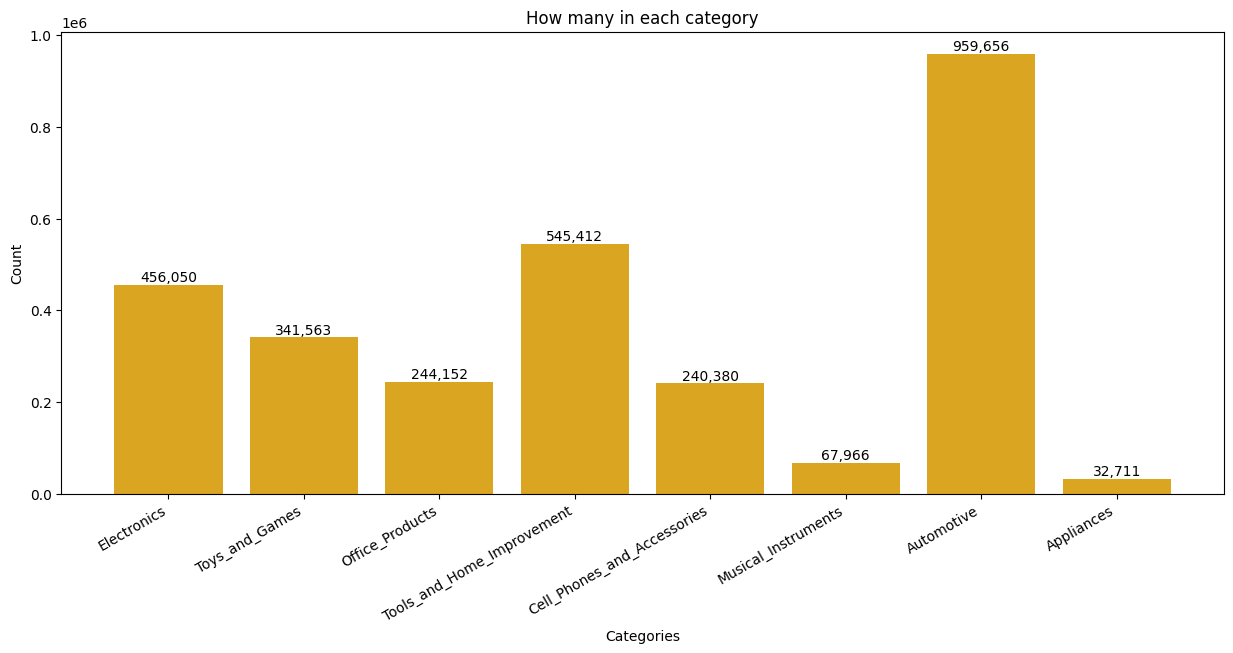

In [22]:
from collections import Counter

from numpy import angle

category_counts = Counter()
for item in items:
    category_counts[item.category] += 1

categories = category_counts.keys()
counts = [category_counts[category] for category in categories]

plt.figure(figsize=(15,6))
plt.title('How many in each category')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.bar(categories, counts, color = 'goldenrod')
plt.xticks(ha='right', rotation=30)

for i, v in enumerate(counts):
    plt.text(i, v, f"{v:,}", ha='center', va='bottom')

plt.show()

In [23]:
np.random.seed(42)

SIZE = 820_000

prices = np.array([item.price for item in items], dtype=float)
categories = np.array([item.category for item in items])

p = (prices - prices.min())/(prices.max() - prices.min() + 1e-9)

w = p**2

w[categories == 'Tools_and_Home_Improvement'] *= 0.5
w[categories == 'Automotive'] *= 0.05

w = w / w.sum()
idx = np.random.choice(len(items), size=SIZE, replace=False, p=w)
sample = [items[i] for i in idx]




In [24]:
len(sample)

820000

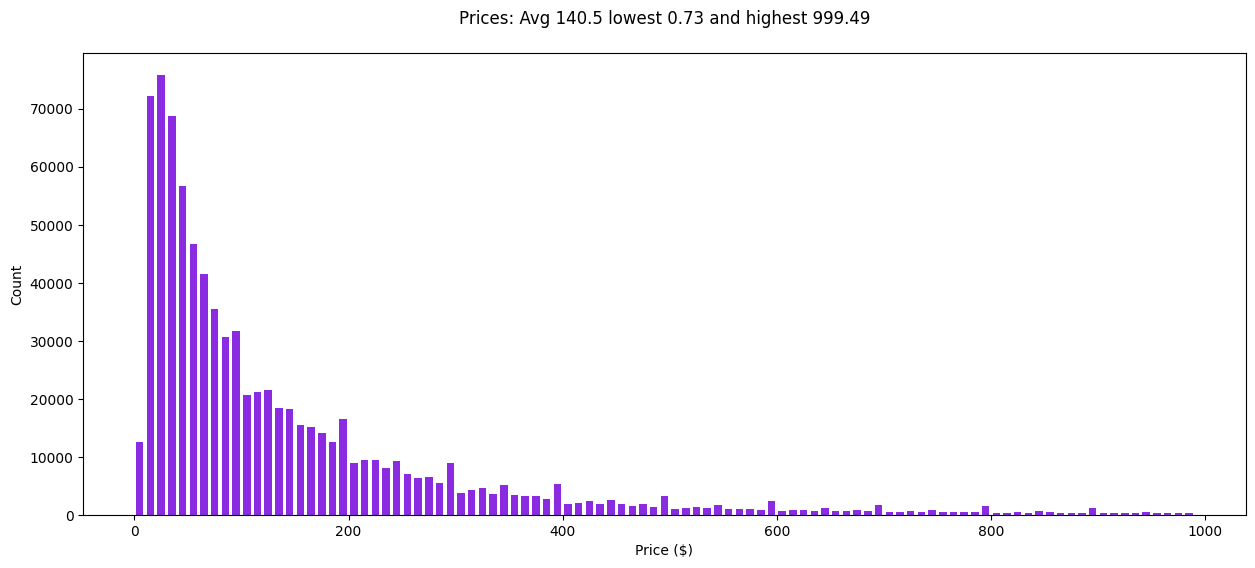

In [28]:
prices = [item.price for item in sample]
plt.figure(figsize=(15,6))
plt.title(f"Prices: Avg {sum(prices)/len(prices):,.1f} lowest {min(prices):,} and highest {max(prices):,}\n")
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.hist(prices, rwidth=0.7, color="blueviolet", bins=range(0, 1000, 10))
plt.show()

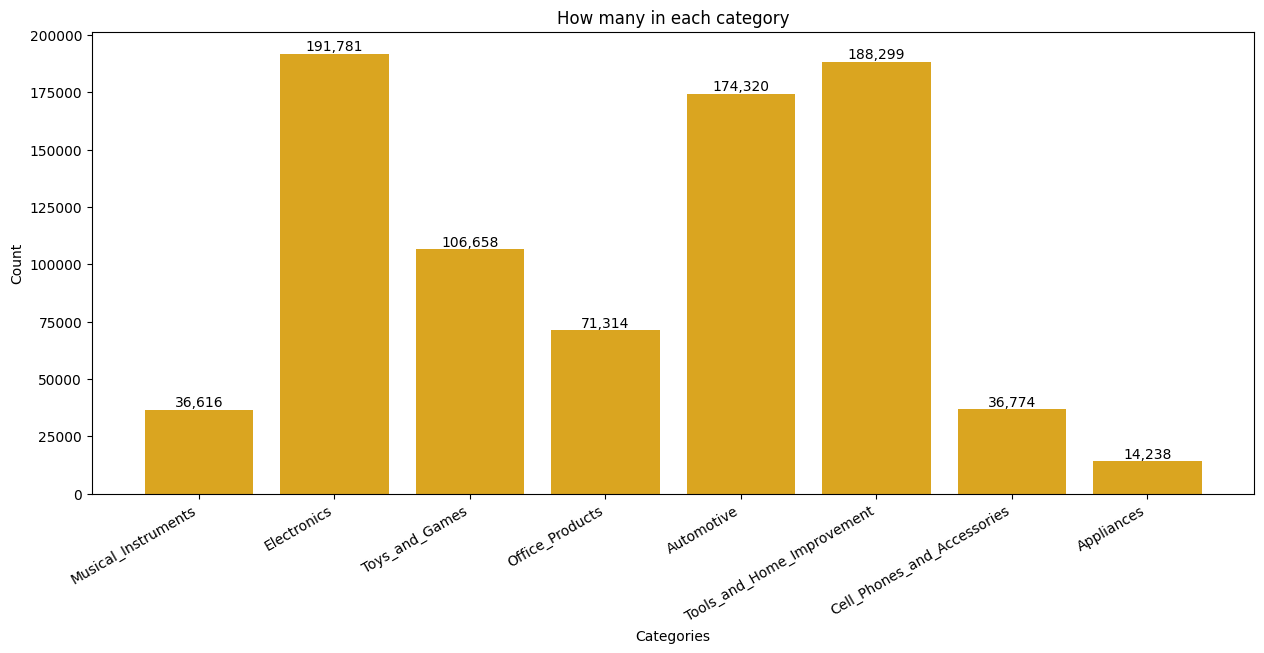

In [27]:
from collections import Counter

from numpy import angle

category_counts = Counter()
for item in sample:
    category_counts[item.category] += 1

categories = category_counts.keys()
counts = [category_counts[category] for category in categories]

plt.figure(figsize=(15,6))
plt.title('How many in each category')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.bar(categories, counts, color = 'goldenrod')
plt.xticks(ha='right', rotation=30)

for i, v in enumerate(counts):
    plt.text(i, v, f"{v:,}", ha='center', va='bottom')

plt.show()

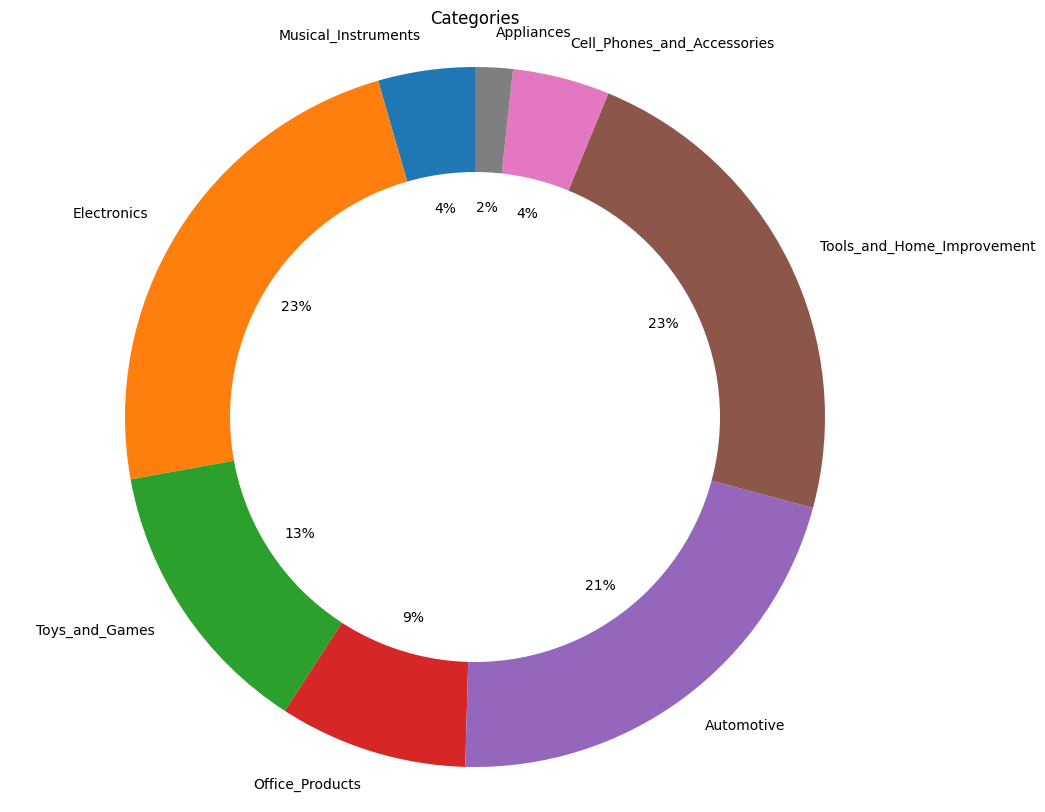

In [30]:
plt.figure(figsize=(12, 10))
plt.pie(counts, labels=categories, autopct='%1.0f%%', startangle=90)

# Add a circle at the center to create a donut chart (optional)
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Categories')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  

plt.show()


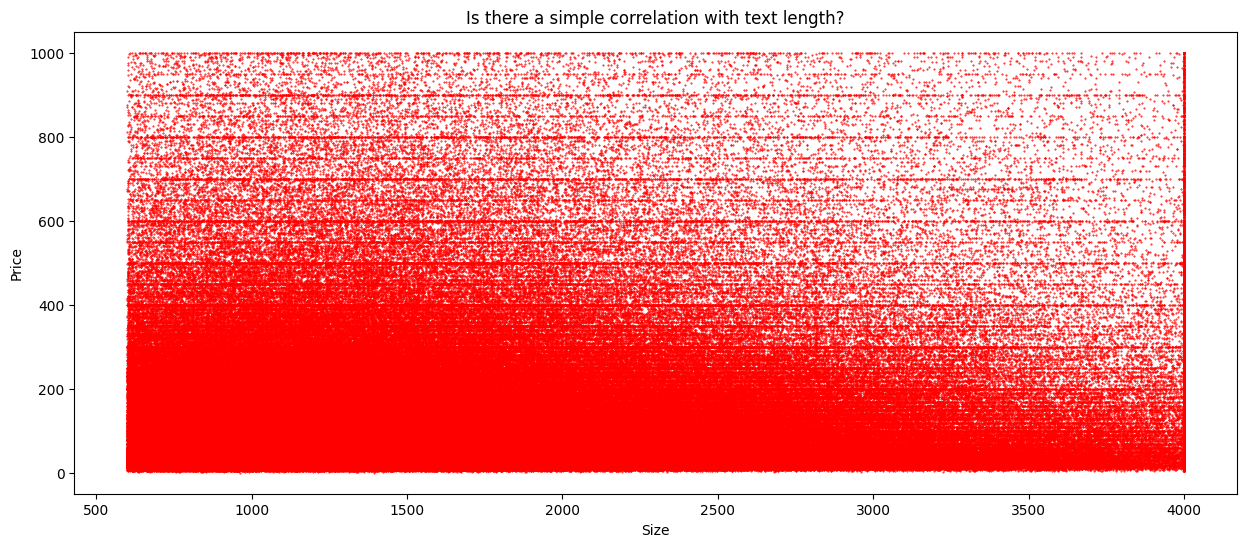

In [32]:
sizes = [len(item.full) for item in sample]
prices = [item.price for item in sample]

plt.figure(figsize=(15,6))
plt.scatter(sizes, prices, s=0.2, color="red")
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Is there a simple correlation with text length?')

# Display the plot
plt.show()

In [34]:
username = "kshitijchaudhary"
full = f"{username}/items_raw_full"
lite = f"{username}/items_raw_lite"

train = sample[:800_000]
val = sample[800_000:810_000]
test = sample[810_000:]

Item.push_to_hub(full, train, val, test)

train_lite = train[:20_000]
val_lite = val[:1_000]
test_lite = test[:1_000:]

Item.push_to_hub(lite, train_lite, val_lite, test_lite)

Uploading the dataset shards:   0%|          | 0/3 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/267 [00:00<?, ?ba/s]

Processing Files (0 / 0): |          |  0.00B /  0.00B            

New Data Upload: |          |  0.00B /  0.00B            

Creating parquet from Arrow format:   0%|          | 0/267 [00:00<?, ?ba/s]

Processing Files (0 / 0): |          |  0.00B /  0.00B            

New Data Upload: |          |  0.00B /  0.00B            

Creating parquet from Arrow format:   0%|          | 0/267 [00:00<?, ?ba/s]

Processing Files (0 / 0): |          |  0.00B /  0.00B            

New Data Upload: |          |  0.00B /  0.00B            

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0): |          |  0.00B /  0.00B            

New Data Upload: |          |  0.00B /  0.00B            

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0): |          |  0.00B /  0.00B            

New Data Upload: |          |  0.00B /  0.00B            

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

Processing Files (0 / 0): |          |  0.00B /  0.00B            

New Data Upload: |          |  0.00B /  0.00B            

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Processing Files (0 / 0): |          |  0.00B /  0.00B            

New Data Upload: |          |  0.00B /  0.00B            

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Processing Files (0 / 0): |          |  0.00B /  0.00B            

New Data Upload: |          |  0.00B /  0.00B            